In [30]:
import numpy as np
import pandas as pd


In [31]:
V_INFO_PATH = '/workspace/DataInfo/data_info_V_2022_04_23.csv'
VI_INFO_PATH = '/workspace/DataInfo/data_info_VI_2022_04_21.csv'

In [32]:
df_v = pd.read_csv(V_INFO_PATH)
df_vi = pd.read_csv(VI_INFO_PATH)

In [33]:
df_v.columns

Index(['Data', 'Case', 'Lesion Type', 'Lesion Location', 'Probability', 'I/V',
       'File Name', 'Lesion Size', 'Background Size', 'Original Shape',
       '1mm Resized Shape', 'Original Center', '1mm Resized Center',
       'Pixel Size', 'Spine Shape', 'Spine Resized Shape', 'Spine Center',
       'Spine Resized Shape.1', 'X Spacing', 'Y Spacing', 'Slice Interval'],
      dtype='object')

In [ ]:
df_v['Volume'] = df_v['Pixel Size'] * df_v['X Spacing'] * df_v['Y Spacing'] * df_v['Slice Interval'].apply(abs)
small_lesion_idx = df_v['Volume'] < 66

In [56]:
new_df_v = df_v.loc[~small_lesion_idx,:].drop('Data', axis=1).drop_duplicates().reset_index(drop=True)

In [57]:
new_df_v.to_csv('/workspace/DataInfo/data_info_V_2022_04_27.csv')

In [61]:
lytic_idx = new_df_v['Lesion Type'] == 'L'
sclerotic_idx = new_df_v['Lesion Type'] == 'S'
mixed_idx = new_df_v['Lesion Type'] == 'M'

In [64]:
new_df_v.loc[lytic_idx,:].to_csv('/workspace/DataInfo/data_info_V_2022_04_27_lytic.csv')
new_df_v.loc[sclerotic_idx,:].to_csv('/workspace/DataInfo/data_info_V_2022_04_27_sclerotic.csv')
new_df_v.loc[mixed_idx,:].to_csv('/workspace/DataInfo/data_info_V_2022_04_27_mixed.csv')

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
df = pd.read_csv('/workspace/DataInfo/Tumor_vs_other 20220427_3.csv', header=0)

In [11]:
df.head()

,Visible,Type,Tumor,Bone,Diff
0,V,S,488.36,127.99,360.37
1,V,S,636.52,223.79,412.73
2,V,S,981.13,207.34,773.79
3,V,S,563.30,206.18,357.12
4,V,S,485.49,110.48,375.01


Visible
I    AxesSubplot(0.125,0.125;0.775x0.755)
V    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Diff, dtype: object

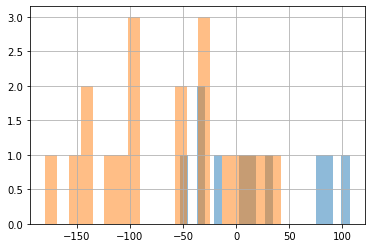

In [29]:
df.loc[df.Type=='L'].groupby(['Visible']).Diff.hist(bins=20, alpha=0.5)